# Event rates

This notebook loads the effective area instrument response function and convolves it with a neutrino point source flux to calculate the expected event rate for KM3NeT/ARCA230.

In [1]:
import matplotlib.pyplot as plt

from arca230.flux import PointSourceFlux
from arca230.aeff import EffectiveArea
from arca230.utils import create_histogram

The flux implementation is a single power law: $\Phi^{\nu_i + \bar{\nu}_i} = \Phi_0 (E/\rm GeV)^{-\gamma}$, with $\Phi_0$ [GeV-1 s-1 m-2]

In [2]:
livetime_1yr = 365.25 * 24 * 60 * 60  # [s]
livetime = 1 * livetime_1yr  # [s]

gamma = 2.0
norm = 5e-5  # [GeV-1 s-1 m-2]

sindec = 0.475  # source location

flux_instance = PointSourceFlux(gamma=gamma, norm=norm)  # see src/flux.py

Load the effective area objects for $\nu_\mu$ CC selected as track and $\nu_e$ CC selected as shower. The effective area is an average between the contribution from $\nu$ and $\bar{\nu}$.

In [3]:
aeff_instance_track = EffectiveArea(file_path="../data/aeff_coszen_allnumuCC_track.csv") 
aeff_instance_shower = EffectiveArea(file_path="../data/aeff_coszen_allnueCC_shower.csv")

Effective Area data loaded successfully.
Effective Area data loaded successfully.


The effective area is stored as a function of $\cos(\theta)$ and $\log_{10}(E_\nu$ [GeV] where $\cos(\theta) = 1$ is straight downgoing. The number of events from a given source location is found by weighting the effective area at different cos(zen) bands with the visibility. This is calculated using `effective_area_at_sindec`. See `analysis/plot_visibility.ipynb` for an example of the visibility of KM3NeT/ARCA.

In [4]:
aeff_decl_track = aeff_instance_track.effective_area_at_sindec(sindec=sindec)
aeff_decl_shower = aeff_instance_shower.effective_area_at_sindec(sindec=sindec)

The effective area for a given source location can be convolved with the flux model to obtain the number of detected events as a function of true neutrino energy.

In [5]:
event_rate_track = aeff_instance_track.event_rate(flux_instance, sindec, livetime)
event_rate_shower = aeff_instance_shower.event_rate(flux_instance, sindec, livetime)

Now we plot the result. The `create_histogram` function converts the low and high edges, and the bin contents of a dataframe to a dataformat that can be plotted using matplotlib.

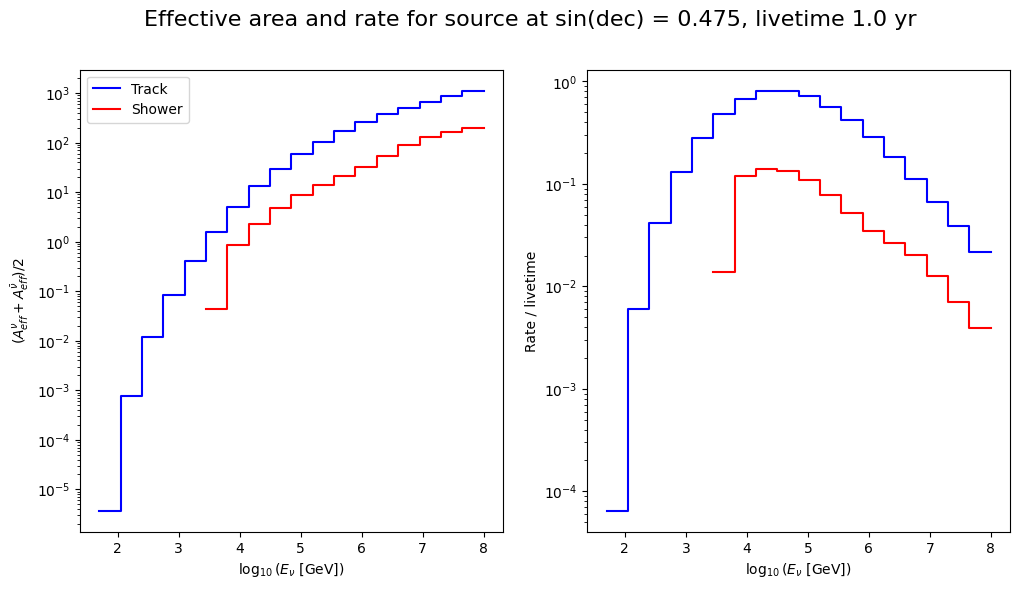

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

fig.suptitle(f"Effective area and rate for source at sin(dec) = {sindec}, livetime {livetime/livetime_1yr} yr", fontsize=16)

# effective area
axes[0].set_yscale("log")
axes[0].set_xlabel(r"$\log_{10}(E_{\nu}$ [GeV])")
axes[0].set_ylabel(r"($A_{eff}^{\nu}+A_{eff}^{\bar{\nu}})/2$")
axes[0].plot(
    *create_histogram(
        aeff_decl_track["log10(nu_E [GeV]) low"],
        aeff_decl_track["log10(nu_E [GeV]) high"],
        aeff_decl_track["aeff [m^2]"],
    ),
    color="blue",
    label="Track",
)
axes[0].plot(
    *create_histogram(
        aeff_decl_shower["log10(nu_E [GeV]) low"],
        aeff_decl_shower["log10(nu_E [GeV]) high"],
        aeff_decl_shower["aeff [m^2]"],
    ),
    color="red",
    label="Shower",
)
axes[0].legend(loc="best")

# event rate
axes[1].set_yscale("log")
axes[1].set_xlabel(r"$\log_{10}(E_{\nu}$ [GeV])")
axes[1].set_ylabel(r"Rate / livetime")
axes[1].plot(
    *create_histogram(
        event_rate_track["log10(nu_E [GeV]) low"],
        event_rate_track["log10(nu_E [GeV]) high"],
        event_rate_track["rate [livetime^-1]"],
    ),
    color="blue",
    label="Track",
)
axes[1].plot(
    *create_histogram(
        event_rate_shower["log10(nu_E [GeV]) low"],
        event_rate_shower["log10(nu_E [GeV]) high"],
        event_rate_shower["rate [livetime^-1]"],
    ),
    color="red",
    label="Shower",
)